In [118]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import secrets
import plotly as plotly
import plotly.express as px
from tqdm import tqdm
import plotly.graph_objects as go
pd.set_option('plotting.backend', 'matplotlib')
plotly.offline.init_notebook_mode()
#warnings.simplefilter(action='ignore', category=FutureWarning)


<h1>PORTFOLIO ONLY IWDA</h1>


In [97]:
TICKER="IWDA.AS"
NUMBER_OF_SIMULATIONS=1000
STARTING_CAPITAL = 10000
YEARS_OF_SIMULATION=30

In [98]:
YEARS_OF_SIMULATION=YEARS_OF_SIMULATION+1
Market_Days=253

df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

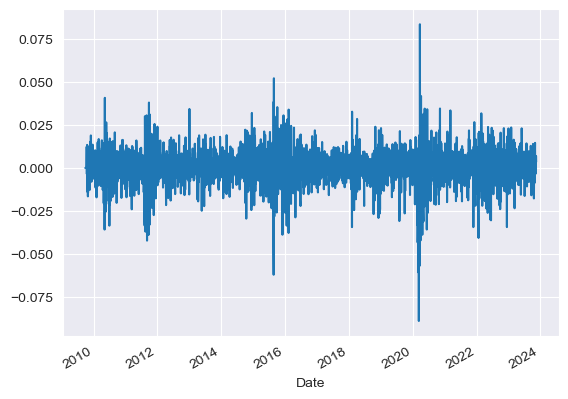

In [99]:
df.plot()

In [100]:
df

Date
2009-09-28    0.000000
2009-09-29    0.000000
2009-09-30    0.000000
2009-10-01    0.000000
2009-10-02    0.000000
                ...   
2023-11-09    0.004418
2023-11-10   -0.002393
2023-11-13    0.007003
2023-11-14    0.006568
2023-11-15    0.003582
Name: Adj Close, Length: 3622, dtype: float64

In [101]:
df_simulations=np.zeros((YEARS_OF_SIMULATION,NUMBER_OF_SIMULATIONS))
df_simulations[0,:]=STARTING_CAPITAL

for x in tqdm(range(0,NUMBER_OF_SIMULATIONS)):
    for i in range(1,YEARS_OF_SIMULATION):
        annual_change=1
        for k in range(Market_Days):
            annual_change=annual_change*(1+(secrets.choice(df.iloc[:])))
        df_simulations[i,x]=annual_change*df_simulations[i-1,x]
df_simulations= pd.DataFrame(df_simulations)
df_simulations_1=  pd.DataFrame(df_simulations)



100%|██████████| 1000/1000 [03:22<00:00,  4.95it/s]


In [102]:
df_simulations_1

0              1              2              3              4    \
0    10000.000000   10000.000000   10000.000000   10000.000000   10000.000000   
1    12313.368079   10840.329743   12534.749650    7687.461219    9597.238724   
2    13303.815309    9973.670746   19184.333676    8453.172699   11674.197753   
3    16414.933792   10390.412961   17912.959775    8979.691504   16491.934235   
4    17780.665601   14310.046252   24571.133799    9983.826905   16086.436354   
5    19662.591981   17444.678303   30092.546212   13730.743680   20515.879817   
6    24724.293231   17908.797461   28109.207649   17586.382679   20756.437085   
7    26870.685969   19181.851998   27138.246144   18055.699638   21016.434914   
8    28364.929989   19690.376303   27133.262451   14380.166818   23056.063207   
9    21435.751203   16659.597981   32916.813876   16688.883268   21485.893992   
10   34411.930605   16450.835483   30857.292342   14447.151756   21217.345715   
11   37313.637894   21527.637729   35408.454845   15464.789264   21715.206197   
12   42219.465799   25908.992702   36422.526854   17880.059039   28797.927656   
13   40858.421164   28704.555726   42682.721745   20705.902232   34945.887249   
14   50576.480520   31914.794552   37610.259066   21203.736565   31152.538629   
15   56203.350367   43029.089262   42801.965884   20683.166026   30644.781218   
16   65531.569348   52508.536325   45257.399508   23589.335981   38519.809718   
17   75049.399598   56588.459175   59151.890101   34529.586253   38542.264059   
18   81978.734598   56705.308780   90867.736407   40983.236107   43359.406779   
19   82255.767710   66608.156543  124491.047097   47975.459602   56663.938339   
20   92519.845454   67097.730683  132857.326297   49545.404534   56009.903132   
21   93126.898828   73488.792731  195379.448617   42686.611621   58210.451453   
22   98907.810613   77318.368912  223121.879654   44096.557571   72864.947233   
23  166054.723679   68917.463398  234515.441820   41941.582464   90243.735799   
24  144805.011210   74483.652259  232135.489495   49532.377791  124089.864518   
25  145392.040670   67086.595306  233757.035881   72490.110921  124225.553373   
26  162648.091757   82285.190738  297468.924164   83074.767381  141498.043553   
27  192162.418056   89874.832247  410338.124143   96328.778071  125238.563268   
28  217320.414180  117625.464232  418249.220724  134878.370759  106296.719793   
29  233174.039080  124143.641503  401251.381888  125575.836243  130271.735099   
30  240377.999289  148272.715232  387555.297204  149026.207456  196248.731824   

              5              6             7              8              9    \
0    10000.000000   10000.000000  10000.000000   10000.000000   10000.000000   
1    10504.787151   11593.289800  13066.498185   10892.408553    9092.878159   
2    14142.583734   10903.721436  10082.400191   12598.207368    8369.250287   
3    15598.501539   11263.564228  11695.297533   11979.422208    8622.415527   
4    14803.074173   12507.071491  13694.356004   10782.445705   10054.500035   
5    12771.902110   13084.471496  14577.679356   11938.104495    9319.563972   
6    14994.499497   12826.700016  16229.888510   13186.232550    7583.554704   
7    15457.620936   12496.136742  19342.220823   15374.527672   10198.466927   
8    16661.940125   14216.047540  16806.205708   23697.830062   10208.561808   
9    16006.937047   14455.631334  16813.512634   30175.329717   11853.012990   
10   17263.889039   14143.594347  19241.401966   32836.033114   10491.262187   
11   19416.984384   14537.248687  21126.984870   40936.545960    9524.201521   
12   21601.946891   17042.298566  21865.466641   44774.183203   11393.314445   
13   19429.798128   19341.362992  18728.234119   51487.851186   10598.535387   
14   18547.781703   26096.766561  16469.909818   58385.088184   10213.265114   
15   15591.238827   28187.001203  18068.497556   75980.453048    9294.673834   
16   16945.671066   30403.258969  17607.134542   96747.092610

In [103]:
df_simulations=df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION-1]

0      240377.999289
1      148272.715232
2      387555.297204
3      149026.207456
4      196248.731824
           ...      
995    333929.278063
996    339723.780659
997    231930.979538
998     81028.843693
999    217273.760962
Name: 30, Length: 1000, dtype: float64

In [104]:
quantile=df_simulations.iloc[YEARS_OF_SIMULATION-1].quantile([0.1,0.9])
quantile=list(quantile)
print(quantile)
df_simulations_purged=df_simulations[df_simulations.columns[ df_simulations.max() < quantile[1]]]
df_simulations_purged=df_simulations_purged[df_simulations_purged.columns[ df_simulations_purged.max() > quantile[0]]]


[77107.80451093665, 722493.1954776454]


<Axes: title={'center': 'Simulation of 1000 portfolios'}>

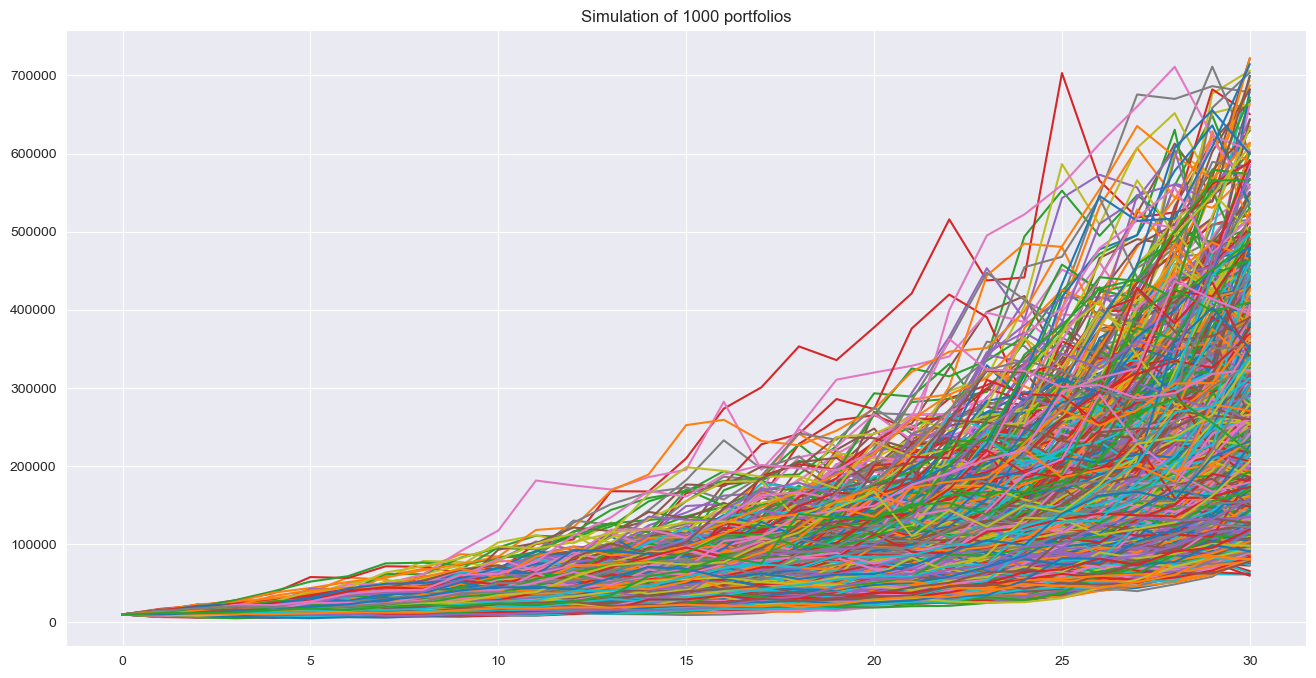

In [105]:
df_simulations_purged.plot(figsize=(16,8), title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios", legend=False)


<Axes: ylabel='Density'>

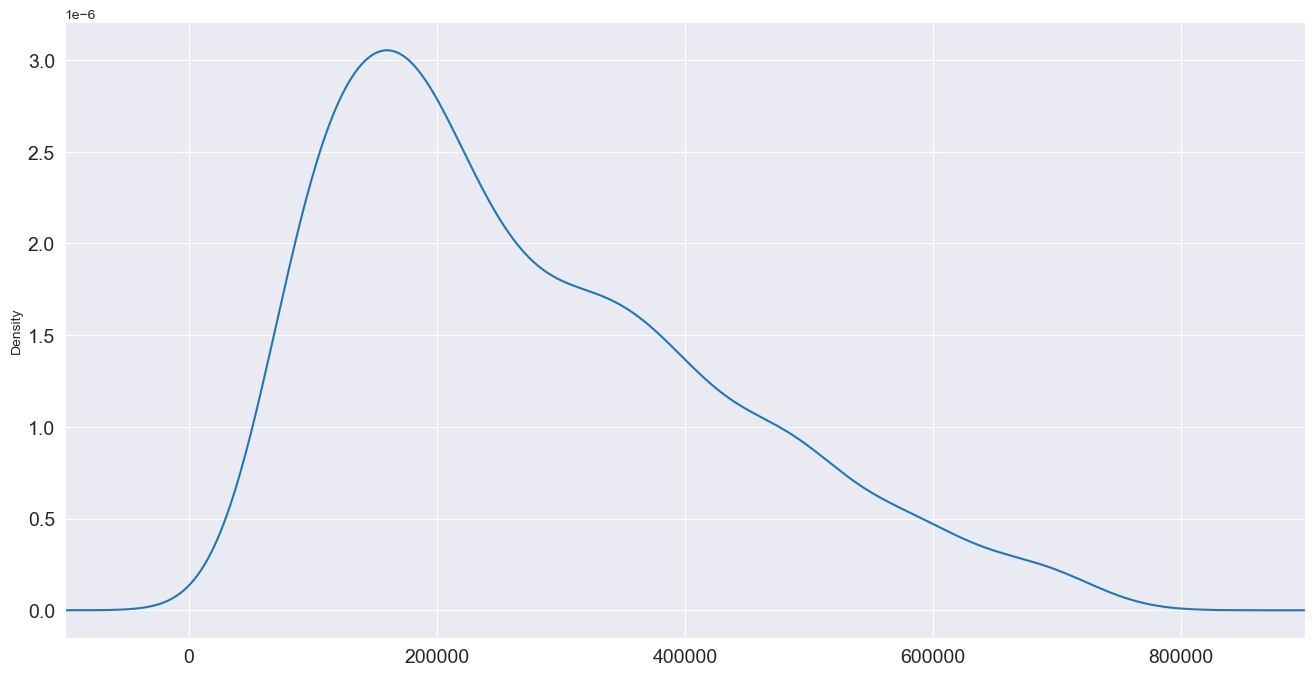

In [106]:
df_simulations_purged.iloc[YEARS_OF_SIMULATION-1].plot.density(figsize=(16,8),fontsize=14, xlim=(-100000,900000))

In [107]:
top_25 =[]
low_25 =[]
median=[]
for i in range(0,YEARS_OF_SIMULATION):
    top_25.append(df_simulations.iloc[i].quantile(0.75))
    low_25.append(df_simulations.iloc[i].quantile(0.25))
    median.append(df_simulations.iloc[i].median())
columns=["top 25%","median","bottom 25%"]
df_statistics=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)
df_statistics
    
    





top 25%         median     bottom 25%
0    10000.000000   10000.000000   10000.000000
1    12348.333554   11109.041030   10006.396264
2    14200.429839   12171.658750   10644.066110
3    16418.635680   13676.767940   11431.689400
4    18909.276997   15447.853332   12445.011851
5    21832.280496   17103.455678   13383.796337
6    24311.712250   19291.270609   15083.357567
7    27630.160441   21455.566453   16404.243026
8    31317.266818   23742.298014   17702.520834
9    35751.516445   26709.509849   19684.756245
10   40584.526039   29610.078725   21076.053059
11   46602.194852   32579.591949   23238.045354
12   52432.647163   36351.367744   24959.929030
13   58051.044836   40300.344959   27653.064242
14   64439.277873   44676.567088   29033.616924
15   73011.253750   49596.605492   32436.192026
16   81804.045282   54934.059045   35382.782965
17   91913.439542   60081.754947   38706.836915
18  104947.531211   68010.698888   41766.153084
19  119253.678346   76220.717255   44500.758223
20  133079.264218   85132.677985   51414.917013
21  149362.353497   93444.763122   54921.073782
22  172351.892497  105134.006520   59123.171448
23  190731.978616  116989.207605   67873.036707
24  214912.293196  128330.086687   73917.881840
25  241144.827277  143528.700869   83644.505990
26  272189.611973  160624.673892   89960.393452
27  300701.248346  177930.928963  100589.507553
28  340332.156706  192349.197636  107897.510349
29  387153.937670  217552.771247  122377.502987
30  429483.031623  240061.472868  134759.454432

In [119]:
#ax= df_statistics.plot(legend=None,logy=False,fontsize=20,figsize=(25,15),linewidth=4,color="black",title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios")
pd.set_option('plotting.backend', 'plotly')

fig = df_statistics.plot(width=1600, height=800,title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios",labels= {"index": "Years to Maturity", "value":"Total Capital"} )
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(top_25),fill='tonexty',mode='lines', line_color='blue' , fillcolor ="red", showlegend=False, hoverinfo="skip"))
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(median),fill='tonexty',mode='lines', line_color='orange', fillcolor="green", showlegend=False, hoverinfo="skip"))


In [121]:
ls_simulations_at_profit=[]
for i in range(YEARS_OF_SIMULATION):
    c=len([1 for i in list(df_simulations.iloc[i])if i > STARTING_CAPITAL])
    ls_simulations_at_profit.append(c/NUMBER_OF_SIMULATIONS*100)
pd.set_option('plotting.backend', 'plotly')
df_simulations_at_profit = pd.DataFrame(ls_simulations_at_profit,columns=["Profit %"])
df_simulations_at_profit.plot(title="Minimum investment horizon", labels= {"index": "Period length in years", "value":"Chance to be in profit"})
    
    
    

In [ ]:
TICKER="^GSPC"


In [ ]:
df=yf.download(TICKER)["Adj Close"].pct_change(1).dropna()
df_simulations = np.zeros((YEARS_OF_SIMULATION, NUMBER_OF_SIMULATIONS))
df_simulations[0, :] = STARTING_CAPITAL

for x in tqdm(range(0, NUMBER_OF_SIMULATIONS)):
    for i in range(1, YEARS_OF_SIMULATION):
        annual_change = 1
        for k in range(Market_Days):
            annual_change = annual_change * (1 + (secrets.choice(df.iloc[:])))
        df_simulations[i, x] = annual_change * df_simulations[i - 1, x]
df_simulations = pd.DataFrame(df_simulations)
df_simulations_1 = pd.DataFrame(df_simulations)
df_simulations = df_simulations_1
df_simulations.iloc[YEARS_OF_SIMULATION - 1]
quantile = df_simulations.iloc[YEARS_OF_SIMULATION - 1].quantile([0.1, 0.9])
quantile = list(quantile)
df_simulations_purged = df_simulations[df_simulations.columns[df_simulations.max() < quantile[1]]]
df_simulations_purged = df_simulations_purged[df_simulations_purged.columns[df_simulations_purged.max() > quantile[0]]]
top_25 =[]
low_25 =[]
median=[]
for i in range(0,YEARS_OF_SIMULATION):
    top_25.append(df_simulations.iloc[i].quantile(0.75))
    low_25.append(df_simulations.iloc[i].quantile(0.25))
    median.append(df_simulations.iloc[i].median())
columns=["top 25%","median","bottom 25%"]
df_statistics=pd.DataFrame(list(zip(top_25,median,low_25)),columns=columns)
pd.set_option('plotting.backend', 'plotly')

fig = df_statistics.plot(width=1600, height=800,title=f"Simulation of {NUMBER_OF_SIMULATIONS} portfolios",labels= {"index": "Years to Maturity", "value":"Total Capital"} )
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(top_25),fill='tonexty',mode='lines', line_color='blue' , fillcolor ="red", showlegend=False, hoverinfo="skip"))
fig.add_trace(go.Scatter(x=list(range(0,YEARS_OF_SIMULATION)),y=np.array(median),fill='tonexty',mode='lines', line_color='orange', fillcolor="green", showlegend=False, hoverinfo="skip"))
    

In [ ]:

ls_simulations_at_profit = []
for i in range(YEARS_OF_SIMULATION):
    c = len([1 for i in list(df_simulations.iloc[i]) if i > STARTING_CAPITAL])
    ls_simulations_at_profit.append(c / NUMBER_OF_SIMULATIONS * 100)

pd.set_option('plotting.backend', 'plotly')
df_simulations_at_profit = pd.DataFrame(ls_simulations_at_profit, columns=["Profit %"])
df_simulations_at_profit.plot(title="Minimum investment horizon",
                              labels={"index": "Period length in years", "value": "Chance to be in profit"})

In [ ]:
!jupyter nbconvert --execute --to html Portfolio1.ipynb --HTMLExporter.theme=dark